# Lotka-Volterra Model: Predator and Prey

Kristtiya Guerra


In [57]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [58]:
def make_system(beta, gamma, alpha, delta):
    """Make a system object for the SIR model.
    
    beta: death rate of elk due to predation
    gamma:natural death rate of wolves
    alpha:birth rate of elk
    delta:birth rate of wolf due to elk
    
    returns: System object
    """
    init = State(X=1, Y=1)
    init /= np.sum(init)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma, alpha=alpha, delta=delta)

In [59]:
def plot_results(X,Y,title):
    """Plot the results of a Elk-Wolf model.
    
    X: TimeSeries
    Y: TimeSeries

    """
    plot(X, '--', label='elk')
    plot(Y, '-', label='wolves')

    decorate(xlabel='Time (days)',
             ylabel='Population',
             title=title)

In [60]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [61]:

def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (x,y)
    t: time
    system: System object
    
    returns: State (xy)
    """
    x = state.x
    y = state.y

    
    elk_birth  = system.alpha * state.x   
    elk_death = system.beta * state.x * state.y
    wolf_birth_d = system.delta * state.x * state.y
    wolf_death = system.gamma * state.y
    
    x += elk_birth - elk_death
    y += wolf_birth_d - wolf_death
    
    
    return State(X=x, Y=y)

Test the updated code with this example.

In [62]:
system = make_system(0.1, 0.1, 0.5, 0.1)
results = run_simulation(system, update_func)
results.head()

AttributeError: 'State' object has no attribute 'x'

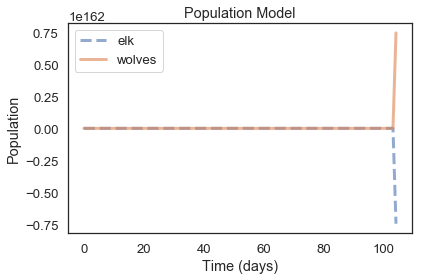

In [56]:
plot_results(results.Y, results.X,'Population Model')


### Sweeping beta

Make a range of values for `beta`, with constant `gamma`.

In [8]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25

0.25

Run the simulation once for each value of `beta` and print total infections.

In [9]:
for beta in beta_array:
    system = make_system(beta, gamma)
    results = run_simulation(system, update_func)
    print(system.beta, calc_total_infected(results))

0.1 0.0072309016649785285
0.2 0.038410532615067994
0.30000000000000004 0.33703425948982
0.4 0.6502429153895082
0.5 0.8045061124629623
0.6 0.8862866308018508
0.7000000000000001 0.9316695082755875
0.8 0.9574278300784942
0.9 0.9720993156325133
1.0 0.9803437149675784
1.1 0.9848347293510136


Wrap that loop in a function and return a `SweepSeries` object.

In [10]:
def sweep_beta(beta_array, gamma):
    """Sweep a range of values for beta.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[system.beta] = calc_total_infected(results)
    return sweep

Sweep `beta` and plot the results.

In [11]:
infected_sweep = sweep_beta(beta_array, gamma)

,values
0.1,0.007231
0.2,0.038411
0.3,0.337034
0.4,0.650243
0.5,0.804506
0.6,0.886287
0.7,0.931670
0.8,0.957428
0.9,0.972099
1.0,0.980344


Saving figure to file figs/chap06-fig01.pdf


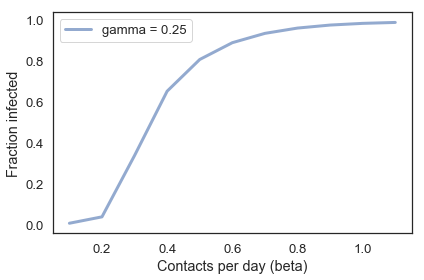

In [12]:
label = 'gamma = ' + str(gamma)
plot(infected_sweep, label=label)

decorate(xlabel='Contacts per day (beta)',
         ylabel='Fraction infected')

savefig('figs/chap06-fig01.pdf')

### Sweeping gamma

Using the same array of values for `beta`

In [13]:
beta_array

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

And now an array of values for `gamma`

In [14]:
gamma_array = [0.2, 0.4, 0.6, 0.8]

[0.2, 0.4, 0.6, 0.8]

For each value of `gamma`, sweep `beta` and plot the results.

Saving figure to file figs/chap06-fig02.pdf


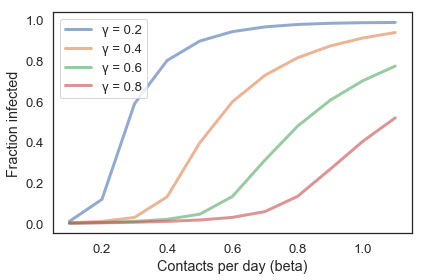

In [15]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = 'γ = ' + str(gamma)
    plot(infected_sweep, label=label)
    
decorate(xlabel='Contacts per day (beta)',
         ylabel='Fraction infected',
         loc='upper left')

savefig('figs/chap06-fig02.pdf')

** Exercise:**  Suppose the infectious period for the Freshman Plague is known to be 2 days on average, and suppose during one particularly bad year, 40% of the class is infected at some point.  Estimate the time between contacts.

In [18]:
# Solution goes here

In [19]:
# Solution goes here

In [20]:
# Solution goes here